In [1]:
source(file = "util.r")

install_packages(c('ggplot2', 'zoo', 'forecast', 'quantmod', 'gridExtra'), quietly = T, warn.conflicts = F)

if( ! require( 'ggfortify' ) ){
      install.packages( 'ggfortify' , dependencies = TRUE )
      require( 'ggfortify' )
}

Version 0.4-0 included new data defaults. See ?getSymbols.
Loading required package: ggfortify


## Stationarity

In [2]:
library(repr)
options(repr.plot.width=12, repr.plot.height=6)

options("getSymbols.warning4.0"=FALSE)  
options("getSymbols.yahoo.warning"=FALSE)
getSymbols("IBM",src="yahoo")

daily_change = diff(Cl(IBM), na.rm=TRUE)

[1] "IBM"

### Autocorrelation Plots

Warning message:
“Removed 1 rows containing missing values (geom_path).”

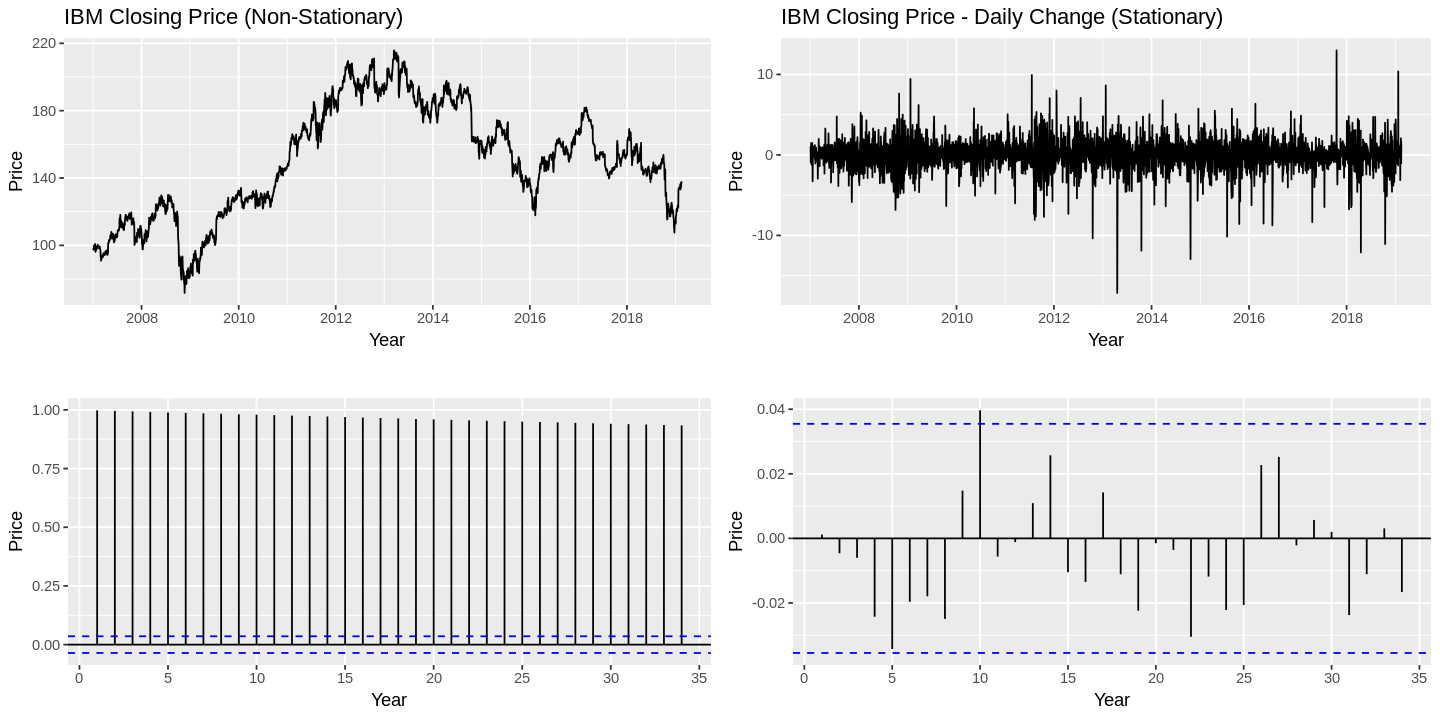

In [3]:
plot1 <- autoplot(IBM$IBM.Close)  +
  ggtitle("IBM Closing Price (Non-Stationary)") +
  xlab("Year") +
  ylab("Price")

plot2 <- ggAcf(IBM$IBM.Close)  +
  ggtitle("") +
  xlab("Year") +
  ylab("Price")

plot3 <- autoplot(daily_change, na.rm=TRUE)  +
  ggtitle("IBM Closing Price - Daily Change (Stationary)") +
  xlab("Year") +
  ylab("Price")

plot4 <- ggAcf(daily_change)  +
  ggtitle("") +
  xlab("Year") +
  ylab("Price")

grid.arrange(plot1, plot3, plot2, plot4, nrow=2, ncol=2)

### Box-Ljung

In [4]:
Box.test(IBM$IBM.Close, lag=10, type="Ljung-Box")


	Box-Ljung test

data:  IBM$IBM.Close
X-squared = 29879, df = 10, p-value < 2.2e-16


In [5]:
Box.test(daily_change, lag=10, type="Ljung-Box")


	Box-Ljung test

data:  daily_change
X-squared = 15.119, df = 10, p-value = 0.1278


---

In [6]:
library(IRdisplay)
display_markdown("<style>table {float:left}</style>") # left align markdown table, below

<style>table {float:left}</style>

OU M249 Guidelines:



| p  <img width=100/>    | Evidence of autocorrelation at lags 1 to k  | dataset
| ---------------------- | ------------------------------------------- | --------------
| $p > 0.10$             | little                                      | daily_change (0.1278)
| $0.10 \geq p > 0.05$   | weak                                        |   
| $0.15 \geq p > 0.01$   | moderate                                    |     
| $p \leq 0.01$          | strong                                      | IBM.Close (2.2e-16)


## TODO ...

In [7]:
ndiffs(IBM$IBM.Close)

[1] 1

In [8]:
AirPassengers %>% log() %>% nsdiffs()

[1] 1

In [9]:
AirPassengers %>% log() %>% diff(lag=12) %>% ndiffs()

[1] 0